In [3]:
import Pkg
Pkg.activate("../../")

  Activating project at `~/Documents/MPSTime.jl`


In [6]:
using JLD2
using Plots
#using JSON
using StatsPlots
#using NPZ
using Plots.PlotMeasures

Kepler Gamma Doradus

In [7]:
# load the KGD data
kgd_dataf = jldopen("kepler_gamma_instance_splits.jld2")
kgd_data = read(kgd_dataf, "kepler_gamma_instance_splits");

In [9]:
# load the python benchmarks
kgd_python_bmarksf = jldopen("GD_pyalgs.jld2")
kgd_britsi_means = read(kgd_python_bmarksf, "mmae_kepGD_britsi")
kgd_britsi_stds = read(kgd_python_bmarksf, "std_kepGD_britsi")
kgd_cdrec_means = read(kgd_python_bmarksf, "mmae_kepGD_cdrec")
kgd_cdrec_stds= read(kgd_python_bmarksf, "std_kepGD_cdrec")
kgd_csdi_means = read(kgd_python_bmarksf, "mmae_kepGD_csdi")
kgd_csdi_stds= read(kgd_python_bmarksf, "std_kepGD_csdi")

5×10 Matrix{Float64}:
 0.00557057  0.0057702   0.00537085  …  0.00547979  0.00721252  0.00612908
 0.00562305  0.00665101  0.00636667     0.00735773  0.00837152  0.0092061
 0.00509693  0.00512554  0.00518846     0.00549613  0.00570899  0.00600729
 0.00363102  0.00363979  0.00391091     0.00428052  0.00455869  0.00511197
 0.015675    0.0161158   0.0159779      0.0159384   0.0171668   0.0157071

In [11]:
krrl_python_bmarksf = jldopen("C6_pyalgs.jld2")
krrl_britsi_means = read(krrl_python_bmarksf, "mmae_kepC6_britsi")
krrl_britsi_stds = read(krrl_python_bmarksf, "std_kepC6_britsi")
krrl_cdrec_means = read(krrl_python_bmarksf, "mmae_kepC6_cdrec")
krrl_cdrec_stds = read(krrl_python_bmarksf, "std_kepC6_cdrec")
krrl_csdi_means = read(krrl_python_bmarksf, "mmae_kepC6_csdi")
krrl_csdi_stds = read(krrl_python_bmarksf, "std_kepC6_csdi")

5×10 Matrix{Float64}:
 0.0124608    0.01167      0.0113216   …  0.0106133   0.00777133  0.00622591
 0.00976973   0.0100336    0.00977957     0.00974329  0.00851857  0.00604186
 0.000940988  0.000775493  0.0007953      0.00157662  0.0017386   0.0018703
 0.0129968    0.0124422    0.0123691      0.0125243   0.00925579  0.00564604
 0.0120227    0.0125667    0.0123304      0.010444    0.00935095  0.00697528

In [13]:
# contains both Gamma Doradus and RR-Lyrae(KepC6)
mps_nn_f = jldopen("Kepler_mps_and_nn.jld2")
krrl_mps_means = read(mps_nn_f, "mmae_kepC6")
krrl_mps_stds = read(mps_nn_f, "std_kepC6")
krrl_nn_means = read(mps_nn_f, "mmae_kepC6_nn")
krrl_nn_stds = read(mps_nn_f, "std_kepC6_nn")

kgd_mps_means = read(mps_nn_f, "mmae_kepGD")
kgd_mps_stds = read(mps_nn_f, "std_kepGD")
kgd_nn_means = read(mps_nn_f, "mmae_kepGD_nn")
kgd_nn_stds = read(mps_nn_f, "std_kepGD_nn")

5×10 Matrix{Float64}:
 8.94293e-5  7.32269e-5  7.79204e-5  …  6.19161e-5  5.79299e-5  6.14924e-5
 3.99282e-5  4.26973e-5  4.79695e-5     4.55307e-5  4.26642e-5  3.90385e-5
 6.91584e-5  5.85887e-5  5.65789e-5     6.70634e-5  7.63965e-5  7.22736e-5
 2.26925e-5  3.06038e-5  2.55358e-5     2.27863e-5  2.51598e-5  2.26808e-5
 7.05175e-5  8.38949e-5  8.02119e-5     5.71962e-5  6.3486e-5   6.2748e-5

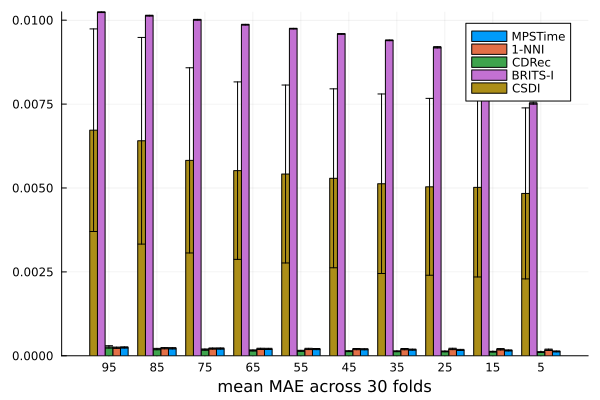

In [14]:
pms = 5:10:95
kgd_mps_means_agg = mean(kgd_mps_means, dims=1)[1, :]
kgd_mps_95_err_agg = mean(kgd_mps_stds, dims=1)[1, :] * 1.96/sqrt(30)
kgd_nn_means_agg = mean(kgd_nn_means, dims=1)[1, :]
kgd_nn_95_err_agg = mean(kgd_nn_stds, dims=1)[1, :] * 1.96/sqrt(30)
kgd_britsi_means_agg = mean(kgd_britsi_means, dims=1)[1, :]
kgd_britsi_95_err_agg = mean(kgd_britsi_stds, dims=1)[1, :] * 1.96/sqrt(30)
kgd_cdrec_means_agg = mean(kgd_cdrec_means, dims=1)[1, :]
kgd_cdrec_95_err_agg = mean(kgd_cdrec_stds, dims=1)[1, :] * 1.96/sqrt(30)
kgd_csdi_means_agg = mean(kgd_csdi_means, dims=1)[1, :]
kgd_csdi_95_err_agg = mean(kgd_csdi_stds, dims=1)[1, :] * 1.96/sqrt(30)
groupedbar(pms, [kgd_mps_means_agg kgd_nn_means_agg kgd_cdrec_means_agg kgd_britsi_means_agg kgd_csdi_means_agg], xticks = pms, labels=["MPSTime" "1-NNI" "CDRec" "BRITS-I" "CSDI"],
    yerr=[kgd_mps_95_err_agg kgd_nn_95_err_agg kgd_cdrec_95_err_agg kgd_britsi_95_err_agg kgd_csdi_95_err_agg],
    legend=:topright,
    xlabel="mean MAE across 30 folds")
xflip!(true)

In [15]:
mean(kgd_csdi_means, dims=1)[1, :]

10-element Vector{Float64}:
 0.004838497798023145
 0.0050192468796469185
 0.005035117169975657
 0.005126757475741967
 0.005289271940609298
 0.005416382515294916
 0.005516719210897453
 0.005822794778627476
 0.006406748493733937
 0.006721993149220803

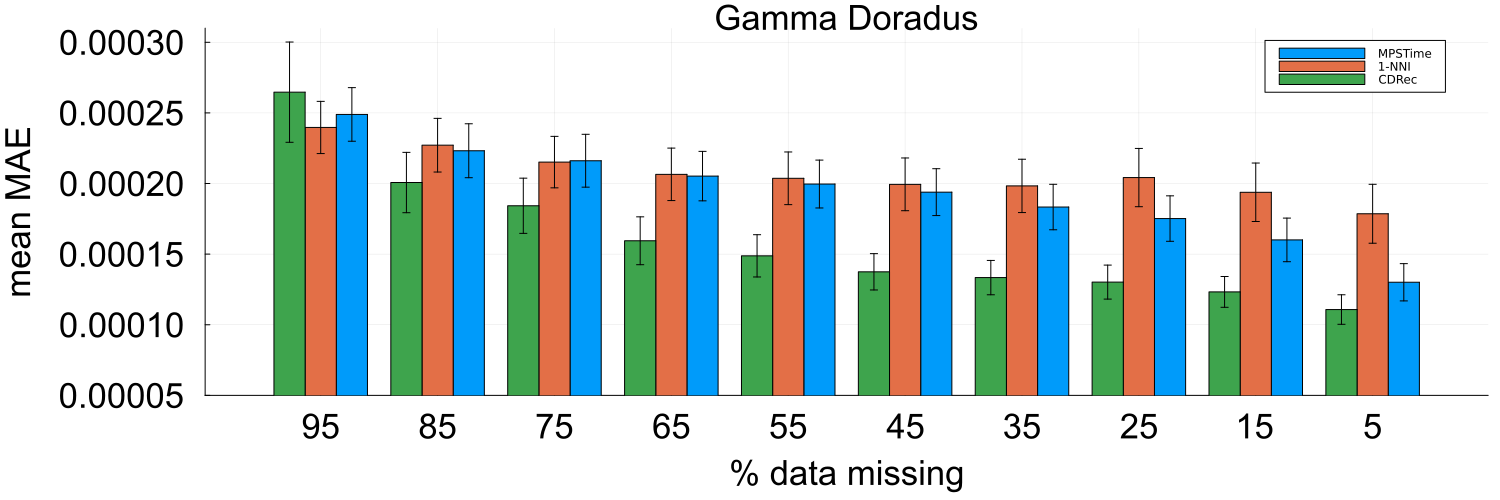

In [16]:
fstyle = font("Arial", 23)
pms = 5:10:95
kgd_mps_means_agg = mean(kgd_mps_means, dims=1)[1, :]
kgd_mps_95_err_agg = mean(kgd_mps_stds, dims=1)[1, :] * 1.96/sqrt(30)
kgd_nn_means_agg = mean(kgd_nn_means, dims=1)[1, :]
kgd_nn_95_err_agg = mean(kgd_nn_stds, dims=1)[1, :] * 1.96/sqrt(30)
kgd_britsi_means_agg = mean(kgd_britsi_means, dims=1)[1, :]
kgd_britsi_95_err_agg = mean(kgd_nn_stds, dims=1)[1, :] * 1.96/sqrt(30)
kgd_cdrec_means_agg = mean(kgd_cdrec_means, dims=1)[1, :]
kgd_cdrec_95_err_agg = mean(kgd_cdrec_stds, dims=1)[1, :] * 1.96/sqrt(30)
kgd_csdi_means_agg = mean(kgd_csdi_means, dims=1)[1, :]
kgd_csdi_95_err_agg = mean(kgd_csdi_stds, dims=1)[1, :] * 1.96/sqrt(30)
groupedbar(pms, [kgd_mps_means_agg kgd_nn_means_agg kgd_cdrec_means_agg], xticks = pms, labels=["MPSTime" "1-NNI" "CDRec"],
    yerr=[kgd_mps_95_err_agg kgd_nn_95_err_agg kgd_cdrec_95_err_agg],
    legend=:topright,
    ylabel="mean MAE",
    xlabel="% data missing",
    title="Gamma Doradus",
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,size=(1500, 500),
    bottom_margin=15mm,
    left_margin=10mm,
    ylims=(0.00005, 0.00031))
xflip!(true)
#savefig("Kepler_Gamma_Doradus_Imputation_Final.svg")

In [17]:
krrl_mps_means_agg = mean(krrl_mps_means, dims=1)[1, :]
krrl_mps_95_err_agg = mean(krrl_mps_stds, dims=1)[1, :] * 1.96/sqrt(30)

krrl_nn_means_agg = mean(krrl_nn_means, dims=1)[1, :]
krrl_nn_95_err_agg = mean(krrl_nn_stds, dims=1)[1, :] * 1.96/sqrt(30)

krrl_csdi_means_agg = mean(krrl_csdi_means, dims=1)[1, :]
krrl_csdi_95_err_agg = mean(krrl_csdi_stds, dims=1)[1, :] * 1.96/sqrt(30)

krrl_cdrec_means_agg = mean(krrl_cdrec_means, dims=1)[1, :]
krrl_cdrec_95_err_agg = mean(krrl_cdrec_stds, dims=1)[1, :] * 1.96/sqrt(30)

krrl_britsi_means_agg = mean(krrl_britsi_means, dims=1)[1, :]
krrl_britsi_95_err_agg = mean(krrl_britsi_stds, dims=1)[1, :] * 1.96/sqrt(30)

10-element Vector{Float64}:
 0.0008254942858148704
 0.00024137335420472663
 0.000168962337998913
 0.00016554792631886704
 0.00016633981014036302
 0.00016134990079207226
 0.00014923418068360937
 0.00015354697747257235
 0.00016526122271295638
 0.00020163534611206534

In [18]:
krrl_britsi_means_agg

10-element Vector{Float64}:
 0.023745856690594026
 0.02418314365403803
 0.024279033389695292
 0.024410600279244705
 0.024495557513750398
 0.024609739254444707
 0.024677461009777902
 0.02471569844449392
 0.02479948723403047
 0.0249177549988849

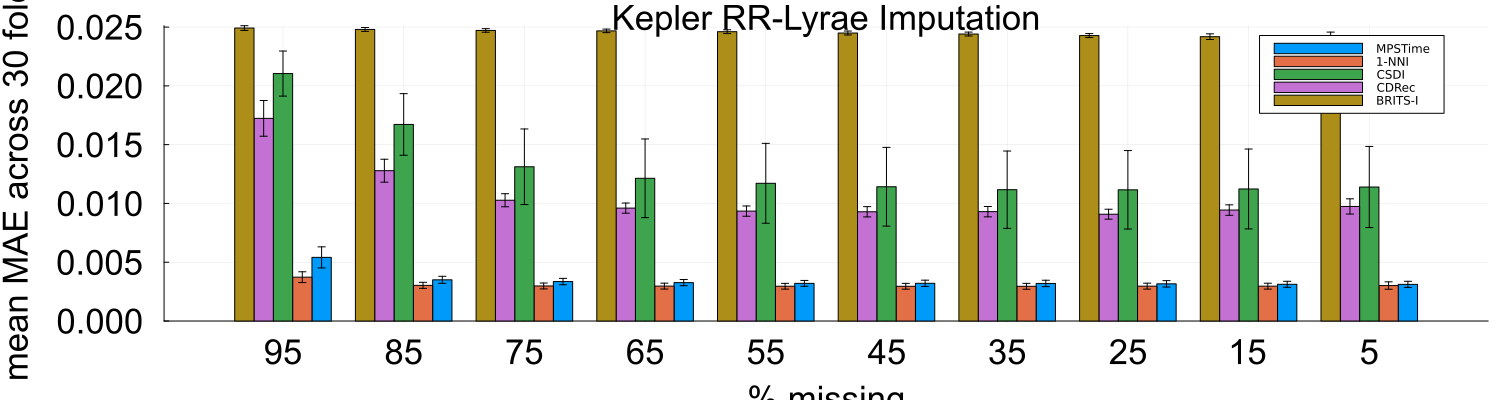

In [19]:
groupedbar(pms, [krrl_mps_means_agg krrl_nn_means_agg krrl_csdi_means_agg krrl_cdrec_means_agg krrl_britsi_means_agg],
    yerr=[krrl_mps_95_err_agg krrl_nn_95_err_agg krrl_csdi_95_err_agg krrl_cdrec_95_err_agg krrl_britsi_95_err_agg],
    labels=["MPSTime" "1-NNI" "CSDI" "CDRec" "BRITS-I"],
    legend=:topright,
    ylabel="mean MAE across 30 folds",
    xlabel="% missing",
    title="Kepler RR-Lyrae Imputation",
    xticks=pms,
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,size=(1500, 400),
    bottom_margin=10mm,
    left_margin=10mm)
xflip!(true)
#savefig("Kepler_RR_Lyrae_Imputation_Final.svg")

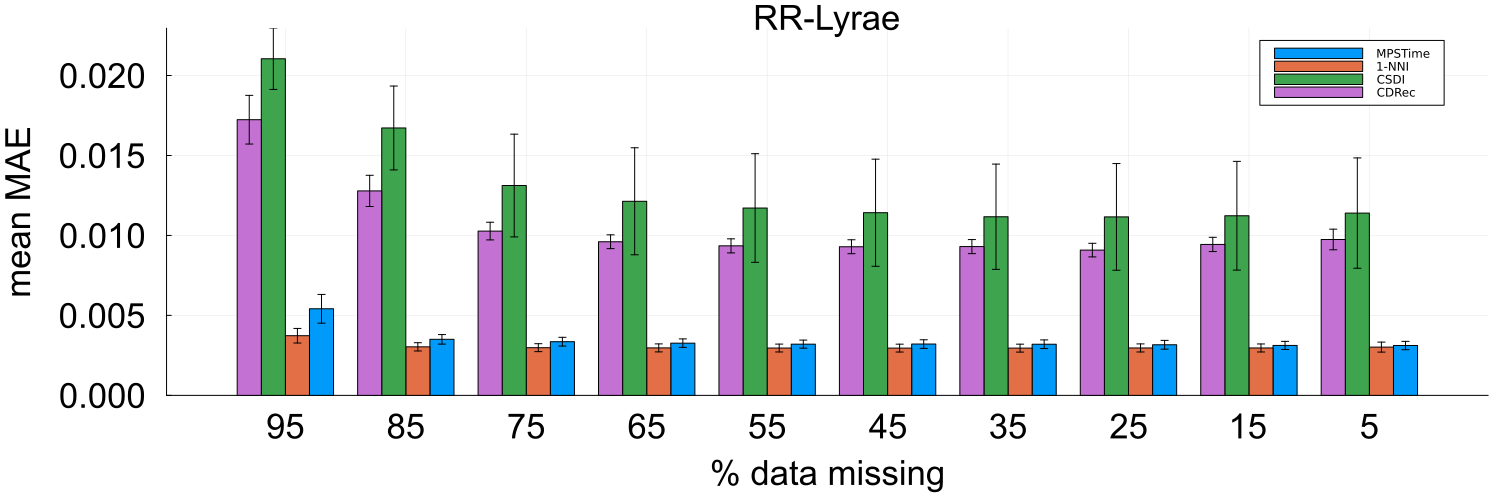

In [20]:
groupedbar(pms, [krrl_mps_means_agg krrl_nn_means_agg krrl_csdi_means_agg krrl_cdrec_means_agg ],
    yerr=[krrl_mps_95_err_agg krrl_nn_95_err_agg krrl_csdi_95_err_agg krrl_cdrec_95_err_agg ],
    labels=["MPSTime" "1-NNI" "CSDI" "CDRec"],
    legend=:topright,
    ylabel="mean MAE",
    xlabel="% data missing",
    title="RR-Lyrae",
    xticks=pms,
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,size=(1500, 500),
    bottom_margin=15mm,
    left_margin=10mm)
xflip!(true)
#savefig("Kepler_RR_Lyrae_Imputation_Final.svg")